In [27]:
import os
import glob
import matplotlib.pyplot as plt
import pandas as pd
from data_utils import combine_wealth_dfs

In [28]:
def get_mean(df: pd.DataFrame):
    '''
    Calculate the mean of the wealth index from a dataframe including
    multiple clusters of a dhs country/year
    Args:
        df (pd.DataFrame):  DataFrame of DHS survey data including
                            a column "WEALTH_INDEX"

    Returns:

    '''
    return wealth_df.WEALTH_INDEX.mean()

In [29]:
def get_median(df: pd.DataFrame):
    '''
    Calculate the median of the wealth index from a dataframe including
    multiple clusters of a dhs country/year
    Args:
        df (pd.DataFrame):  DataFrame of DHS survey data including
                            a column "WEALTH_INDEX"

    Returns:

    '''
    return wealth_df.WEALTH_INDEX.median()

In [30]:
def get_std(df: pd.DataFrame):
    '''
    Calculate the standard deviation of the wealth index from a dataframe including
    multiple clusters of a dhs country/year
    Args:
        df (pd.DataFrame):  DataFrame of DHS survey data including
                            a column "WEALTH_INDEX"

    Returns:

    '''
    return wealth_df.WEALTH_INDEX.std()

In [31]:
def get_var(df: pd.DataFrame):
    '''
    Calculate the variance of the wealth index from a dataframe including
    multiple clusters of a dhs country/year
    Args:
        df (pd.DataFrame):  DataFrame of DHS survey data including
                            a column "WEALTH_INDEX"

    Returns:

    '''
    return wealth_df.WEALTH_INDEX.var()

In [32]:
def get_skew(df: pd.DataFrame):
    '''
    Calculate the skewness of the wealth index from a dataframe including
    multiple clusters of a dhs country/year
    Args:
        df (pd.DataFrame):  DataFrame of DHS survey data including
                            a column "WEALTH_INDEX"

    Returns:

    '''
    return wealth_df.WEALTH_INDEX.skew()

In [33]:
def get_kurtosis(df: pd.DataFrame):
    '''
    Calculate the kurtosis of the wealth index from a dataframe including
    multiple clusters of a dhs country/year
    Args:
        df (pd.DataFrame):  DataFrame of DHS survey data including
                            a column "WEALTH_INDEX"

    Returns:

    '''
    return wealth_df.WEALTH_INDEX.kurtosis()

In [35]:
# get wealth dataframes
csv_path = './gps_csv'
countries = ['Malawi', 'Rwanda', 'Zambia', 'Kenya', 'Uganda', 'Tanzania',
             'DemocraticRepublicofCongo', 'Ethiopia', 'Mozambique', 'Zimbabwe']
wealth_df = combine_wealth_dfs(csv_path)
wealth_df[wealth_df.COUNTRY.isin(countries)]

In [ ]:
statistics = {
    'country_year': [],
    'mean': [],
    'median': [],
    'std': [],
    'var': [],
    'skewness': [],
    'kurtosis': []
}

In [37]:
# get statistic metrics for each country/year combination
csv_list = [csv for csv in os.listdir(csv_path) if any(country in csv for country in countries)]
for csv in csv_list:
    csv_df = pd.read_csv(os.path.join(csv_path, csv))
    statistics['country_year'].append(csv_df.DHSCC.iloc[0]+'_'+str(csv_df.SURVEY_YEAR.iloc[0]))
    statistics['mean'].append(get_mean(csv_df))
    statistics['median'].append(get_median(csv_df))
    statistics['std'].append(get_std(csv_df))
    statistics['var'].append(get_var(csv_df))
    statistics['skewness'].append(get_skew(csv_df))
    statistics['kurtosis'].append(get_kurtosis(csv_df))


In [38]:
# get statistics for all data combined
statistics['country_year'].append('combined')
statistics['mean'].append(get_mean(wealth_df))
statistics['median'].append(get_median(wealth_df))
statistics['std'].append(get_std(wealth_df))
statistics['var'].append(get_var(wealth_df))
statistics['skewness'].append(get_skew(wealth_df))
statistics['kurtosis'].append(get_kurtosis(wealth_df))

In [42]:
cc_mapping = {
    'CD': 'COD',
    'ET': 'ETH',
    'KE': 'KEN',
    'MW': 'MWI',
    'MZ': 'MOZ',
    'RW': 'RWA',
    'TZ': 'TZA',
    'UG': 'UGA',
    'ZM': 'ZMB',
    'ZW': 'ZWE'
}

In [43]:
# mapp dhs country codes to iso
statistics_df = pd.DataFrame.from_dict(statistics, orient='columns')
statistics_df = statistics_df.sort_values(by=['country_year']).reset_index()
statistics_df['country_year'] = statistics_df.country_year.apply(lambda x: x.replace(x[:2], cc_mapping[x[:2]]) if x!='combined' else 'kombiniert')

statistics_df


,index,country_year,mean,median,std,var,skewness,kurtosis
0,9,COD_2014,0.038550,-0.390554,0.958625,0.918962,2.005833,3.031307
1,14,ETH_2011,-0.007492,-0.933504,1.886130,3.557487,1.118379,0.085478
2,17,ETH_2016,0.012098,-0.381761,0.929815,0.864555,0.923636,-0.466208
3,4,KEN_2014,-0.002535,-0.040012,0.846506,0.716573,0.031881,0.459236
4,2,KEN_2015,-0.001298,-0.087786,0.775691,0.601697,-0.001202,0.677301
5,12,MWI_2012,0.005429,-0.417983,0.829797,0.688563,1.385952,0.792405
6,5,MWI_2014,0.000646,-0.426104,0.810925,0.657599,0.984038,-0.302149
7,10,MWI_2016,0.021705,-0.320496,0.754595,0.569413,1.534887,1.670571
8,3,MOZ_2015,0.013473,-0.375884,1.469633,2.159821,0.596114,-0.635971
9,1,MOZ_2018,0.023147,-0.723813,1.852932,3.433358,0.518521,-1.270637


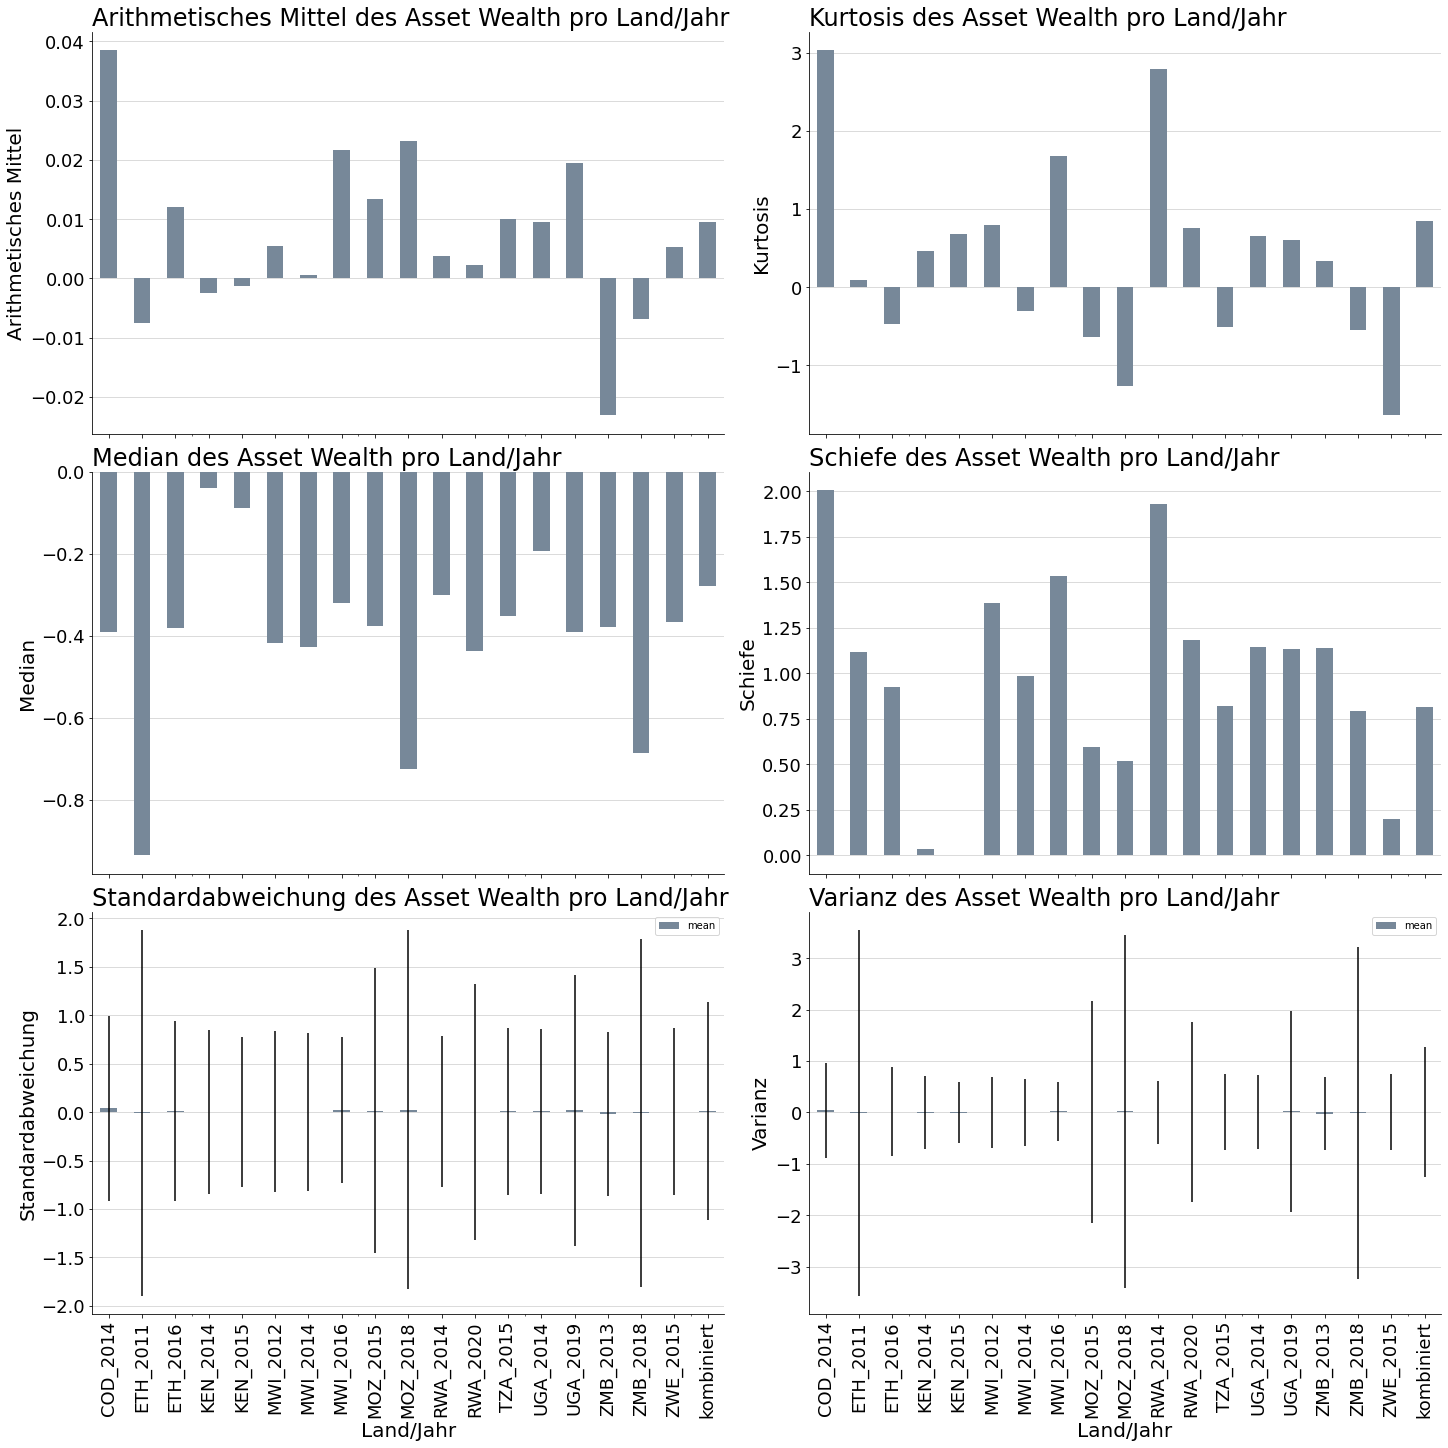

In [57]:
# PLOT THE RESULTS
mosaic = """
    AB
    CD
    EF
    """
fig = plt.figure(constrained_layout=True)
axes = fig.subplot_mosaic(mosaic,sharex=True)

plt.rcParams["figure.figsize"]=(20,20)
for ax in [axes['A'],axes['B'],axes['C'],axes['D'],axes['E'],axes['F']]:
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.set_axisbelow(True)

axes['A'].set_title('Arithmetisches Mittel des Asset Wealth pro Land/Jahr', fontsize=24, loc='left')
statistics_df['mean'].plot(kind='bar', ax=axes['A'], color='lightslategrey')#.set_xticks(statistics_df.index[:-1], statistics_df.country_year.iloc[:-1])
axes['A'].set_ylabel('Arithmetisches Mittel', fontsize=20)
axes['A'].grid(axis='y',color='lightgrey')
axes['A'].spines['top'].set_visible(False)
axes['A'].spines['right'].set_visible(False)

axes['B'].set_title('Kurtosis des Asset Wealth pro Land/Jahr', fontsize=24, loc='left')
statistics_df['kurtosis'].plot(kind='bar', width=.5, ax=axes['B'], color='lightslategrey')

axes['B'].set_ylabel('Kurtosis', fontsize=20) 
axes['B'].grid(axis='y',color='lightgrey')
axes['B'].spines['top'].set_visible(False)
axes['B'].spines['right'].set_visible(False)

axes['C'].set_title('Median des Asset Wealth pro Land/Jahr', fontsize=24, loc='left')    
statistics_df['median'].plot(kind='bar', width=.5,ax=axes['C'], color='lightslategrey')#.set_xticks(statistics_df.index[:-1], statistics_df.country_year.iloc[:-1])
axes['C'].set_xticks(statistics_df.index, statistics_df.country_year, fontsize=18)
axes['C'].set_ylabel('Median', fontsize=20) 
axes['C'].set_xlabel('Land/Jahr', fontsize=20) 
axes['C'].grid(axis='y',color='lightgrey')
axes['C'].spines['top'].set_visible(False)
axes['C'].spines['right'].set_visible(False)

axes['D'].set_title('Schiefe des Asset Wealth pro Land/Jahr', fontsize=24, loc='left')
statistics_df['skewness'].plot(kind='bar', width=.5, ax=axes['D'], color='lightslategrey')
axes['D'].set_xticks(statistics_df.index, statistics_df.country_year, fontsize=18)
axes['D'].set_ylabel('Schiefe', fontsize=20) 
axes['D'].set_xlabel('Land/Jahr', fontsize=20) 
axes['D'].grid(axis='y',color='lightgrey')
axes['D'].spines['top'].set_visible(False)
axes['D'].spines['right'].set_visible(False)


axes['E'].set_title('Standardabweichung des Asset Wealth pro Land/Jahr', fontsize=24, loc='left')
statistics_df.plot(kind='bar', y='mean', width=.5, ax=axes['E'], yerr='std', color='lightslategrey')
axes['E'].set_xticks(statistics_df.index, statistics_df.country_year, fontsize=18)
axes['E'].set_ylabel('Standardabweichung', fontsize=20) 
axes['E'].set_xlabel('Land/Jahr', fontsize=20) 
axes['E'].grid(axis='y',color='lightgrey')
axes['E'].spines['top'].set_visible(False)
axes['E'].spines['right'].set_visible(False)


axes['F'].set_title('Varianz des Asset Wealth pro Land/Jahr', fontsize=24, loc='left')
statistics_df.plot(kind='bar', y='mean', width=.5, ax=axes['F'], yerr='var', color='lightslategrey')
axes['F'].set_xticks(statistics_df.index, statistics_df.country_year, fontsize=18)
axes['F'].set_ylabel('Varianz', fontsize=20) 
axes['F'].set_xlabel('Land/Jahr', fontsize=20) 
axes['F'].grid(axis='y',color='lightgrey')
axes['F'].spines['top'].set_visible(False)
axes['F'].spines['right'].set_visible(False)

# plt.savefig('./asset_wealth_statistic_analysis.png', dpi=300, bbox_inches='tight', pad_inches = 0)
plt.show()